In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data/PI_316201901.csv", low_memory=False)
df = df[df["REGN"] == "1481"] # Сбербанк
df[["REGN", "OKATO", "PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV", "SSKRR", "SSKRV", "SPSR", "SPSV"]] = df[["REGN", "OKATO", "PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV", "SSKRR", "SSKRV", "SPSR", "SPSV"]].apply(pd.to_numeric, errors="coerce")

In [50]:
# Check for null values
df.drop('TIP', axis=1).isnull().groupby(df["TIP"]).sum()

,REGN,OKATO,PREDR_K,PREDR_O,PREDV_K,PREDV_O,SVSK_R,SVSK_V,SVS_R,SVS_V,DKREDR_K,DKREDV_K,ZDLR,ZDLV,ZDLPRR,ZDLPRV,SSKRR,SSKRV,SPSR,SPSV
TIP,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,255,255,255,255
2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Sums of aggregate values
sum_columns = ["PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV"]
sum_results = df.groupby("TIP")[sum_columns].sum()
sum_results

,PREDR_K,PREDR_O,PREDV_K,PREDV_O,DKREDR_K,DKREDV_K,ZDLR,ZDLV,ZDLPRR,ZDLPRV
TIP,,,,,,,,,,
1,130374,2.546806e+08,0,0.00000,9397716,2811,1.138910e+10,4.612927e+06,9.944823e+07,1.982019e+06
1.1,130365,2.546715e+08,0,0.00000,9113304,1233,1.134340e+10,4.003301e+06,9.331920e+07,1.636755e+06
1.1.1,34431,7.699828e+07,0,0.00000,1048332,0,1.830737e+09,0.000000e+00,3.803324e+06,0.000000e+00
1.1.2,2625,4.081354e+06,0,0.00000,181086,0,2.695804e+08,0.000000e+00,2.809471e+04,0.000000e+00
2,34774728,1.059697e+09,4275,222975.89667,84044055,22176,1.939248e+10,7.908363e+06,5.015371e+08,5.141236e+06
2.1,130368,2.546754e+08,0,0.00000,9113568,1233,1.134394e+10,4.003301e+06,9.334561e+07,1.636755e+06


In [44]:
# Means of weighted means
mean_columns = ["SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "SSKRR", "SSKRV", "SPSR", "SPSV"]
mean_results = df.groupby("TIP")[mean_columns].mean()
mean_results

,SVSK_R,SVSK_V,SVS_R,SVS_V,SSKRR,SSKRV,SPSR,SPSV
TIP,,,,,,,,
1,208.592941,0.0,10.236471,0.0,167.835294,51.162353,10.393494,6.860741
1.1,208.595294,0.0,10.236471,0.0,168.060000,45.615294,10.385176,5.019459
1.1.1,198.347059,0.0,10.140000,0.0,175.936471,0.000000,9.846835,0.000000
1.1.2,139.468235,0.0,11.169412,0.0,138.316471,0.000000,9.621071,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.1,208.589412,0.0,10.236471,0.0,168.056471,44.615294,10.385318,4.892400


In [56]:
# Вывести сумму просроченных ипотечных кредитов, предоставленных физическим лицам по всем регионам (в тыс. руб., Сбербанк)
df[df["TIP"] == "2.1"]["ZDLPRR"].sum()

np.float64(93345610.43055001)

In [20]:
def get_ZDLPRR(regn: int, remote=True) -> pd.DataFrame:
    df = pd.DataFrame(index=pd.date_range(start="20160101", end="20211201", freq="MS"))
    for year in np.arange(2016, 2022):
        for month in np.arange(1, 13):
            if year in np.arange(2016, 2020):
                if year == 2019:
                    if month == 1:
                        tip = "1.1"
                    else:
                        tip = "2.1"
                else:
                    tip = "1.1"
            else:
                tip = "2.1"
            if month < 10:
                if month == 1:
                    month_file = "12"
                    year_file = str(year - 1)
                else:
                    month_file = "0" + str(month - 1)
                    year_file = str(year)
                month = "0" + str(month)
            else:
                if month == 10:
                    month_file = "0" + str(month - 1)
                else:
                    month_file = str(month - 1)
                month = str(month)
                year_file = str(year)
            if remote:
                url = "https://raw.githubusercontent.com/JarlPenguin/anomaly_analysis_2025/refs/heads/main/data/" + "PI_316" + year_file + month_file + ".csv"
            else:
                url = "data/PI_316" + year_file + month_file + ".csv"
            df_data = pd.read_csv(url, low_memory=False, dtype={"TIP": object})
            df_data["REGN"] = pd.to_numeric(df_data["REGN"], errors="coerce")
            df_data = df_data[df_data["REGN"] == regn] # Сбербанк
            df_data["ZDLPRR"] = pd.to_numeric(df_data["ZDLPRR"])
            overdue_sum = df_data[df_data["TIP"] == tip]["ZDLPRR"].sum()
            date = str(year) + str(month) + "01"
            df.at[date, "ZDLPRR"] = overdue_sum
    return df

In [21]:
#sberbank_ZDLPRR = get_ZDLPRR(1481) # Сбербанк
sberbank_ZDLPRR = get_ZDLPRR(1481, False) # Сбербанк
sberbank_ZDLPRR

,ZDLPRR
2016-01-01,2.211142e+07
2016-02-01,2.302183e+07
2016-03-01,2.348600e+07
2016-04-01,2.404515e+07
2016-05-01,2.474015e+07
...,...
2021-08-01,2.616502e+07
2021-09-01,2.559667e+07
2021-10-01,2.475784e+07
2021-11-01,2.424239e+07


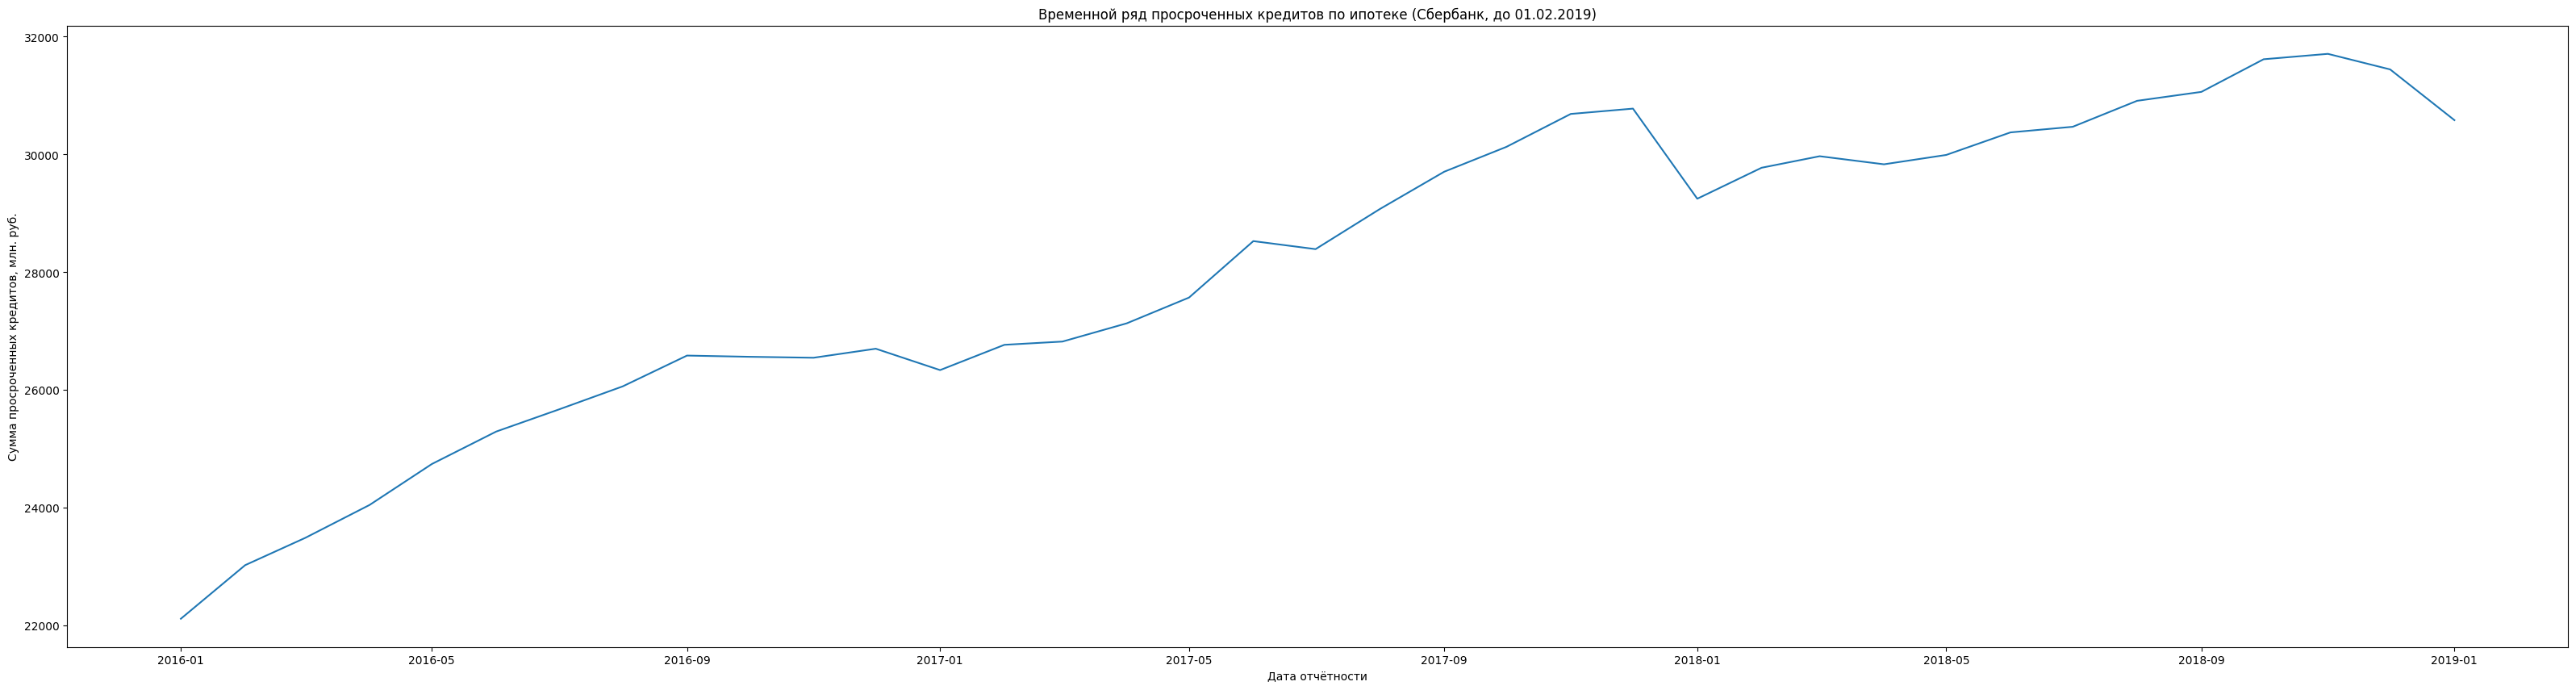

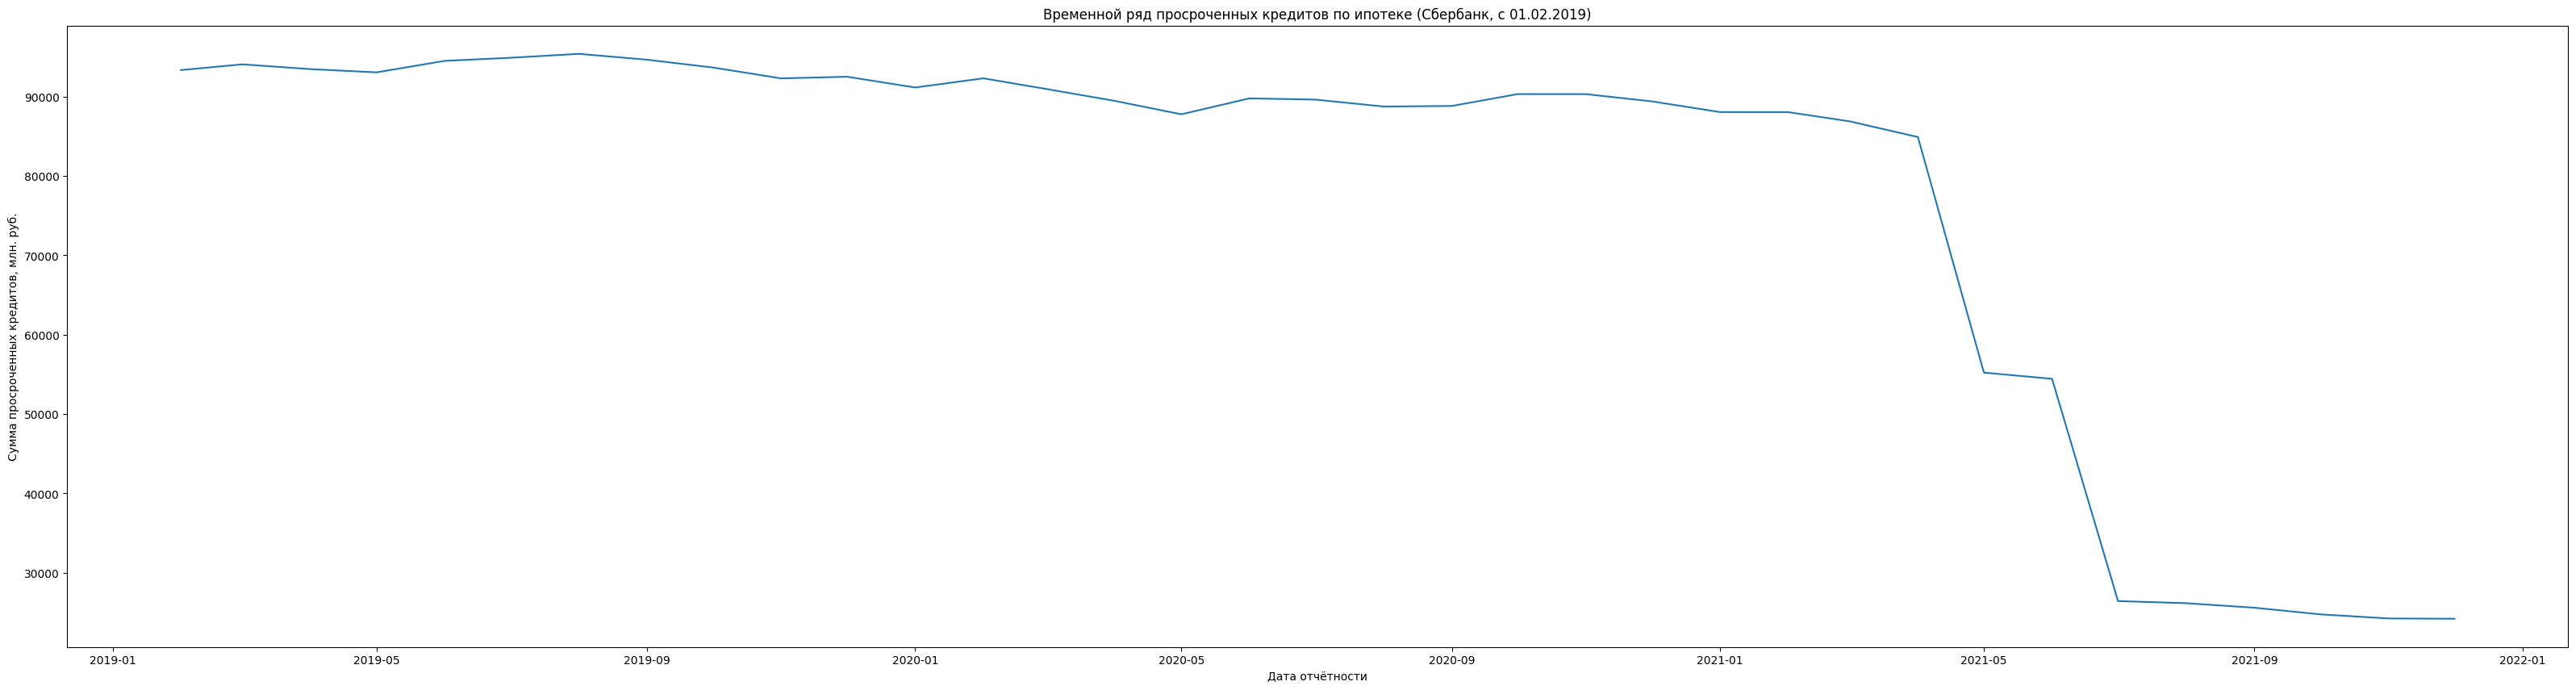

In [28]:
sberbank_ZDLPRR_fig = sberbank_ZDLPRR.copy()
sberbank_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(sberbank_ZDLPRR_fig[sberbank_ZDLPRR_fig.index <= "20190101"])
#plt.xticks(sberbank_ZDLPRR_fig[sberbank_ZDLPRR_fig.index <= "20190101"].index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (Сбербанк, до 01.02.2019)")
plt.show()
plt.figure(figsize=(40, 10))
plt.plot(sberbank_ZDLPRR_fig[sberbank_ZDLPRR_fig.index > "20190101"])
#plt.xticks(sberbank_ZDLPRR_fig[sberbank_ZDLPRR_fig.index > "20190101"].index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (Сбербанк, с 01.02.2019)")
plt.show()

In [16]:
#otkrytiye_ZDLPRR = get_ZDLPRR(2209) # Открытие
otkrytiye_ZDLPRR = get_ZDLPRR(2209, False) # Открытие
otkrytiye_ZDLPRR

,ZDLPRR
2019-02-01,1.099756e+07
2019-03-01,1.145755e+07
2019-04-01,1.138316e+07
2019-05-01,1.163871e+07
2019-06-01,1.141602e+07
2019-07-01,1.119764e+07
2019-08-01,1.126695e+07
2019-09-01,1.133100e+07
2019-10-01,1.120107e+07
2019-11-01,1.137557e+07


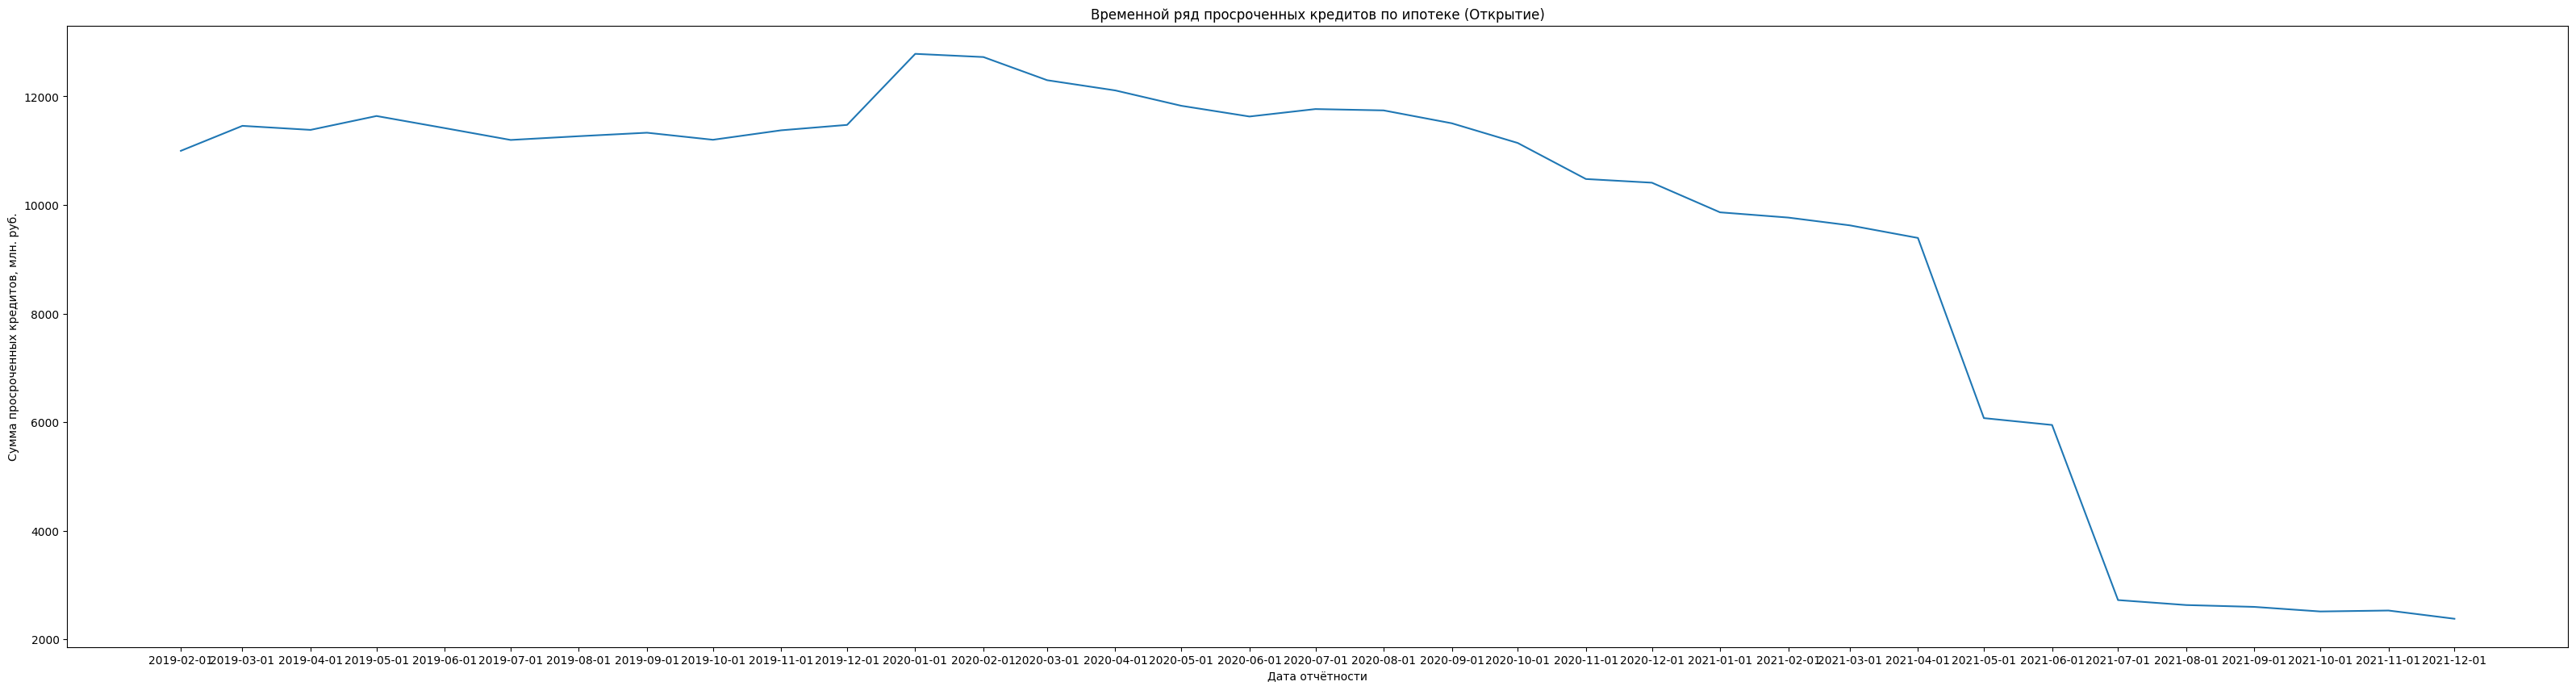

In [39]:
otkrytiye_ZDLPRR_fig = otkrytiye_ZDLPRR.copy()
otkrytiye_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(otkrytiye_ZDLPRR_fig)
plt.xticks(otkrytiye_ZDLPRR_fig.index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (Открытие)")
plt.show()

In [17]:
#mkb_ZDLPRR = get_ZDLPRR(1978) # МКБ
mkb_ZDLPRR = get_ZDLPRR(1978, False) # МКБ
mkb_ZDLPRR

,ZDLPRR
2019-02-01,2.303916e+06
2019-03-01,2.289061e+06
2019-04-01,2.174180e+06
2019-05-01,2.091235e+06
2019-06-01,2.250671e+06
2019-07-01,2.212767e+06
2019-08-01,2.169117e+06
2019-09-01,2.202996e+06
2019-10-01,2.193550e+06
2019-11-01,2.067436e+06


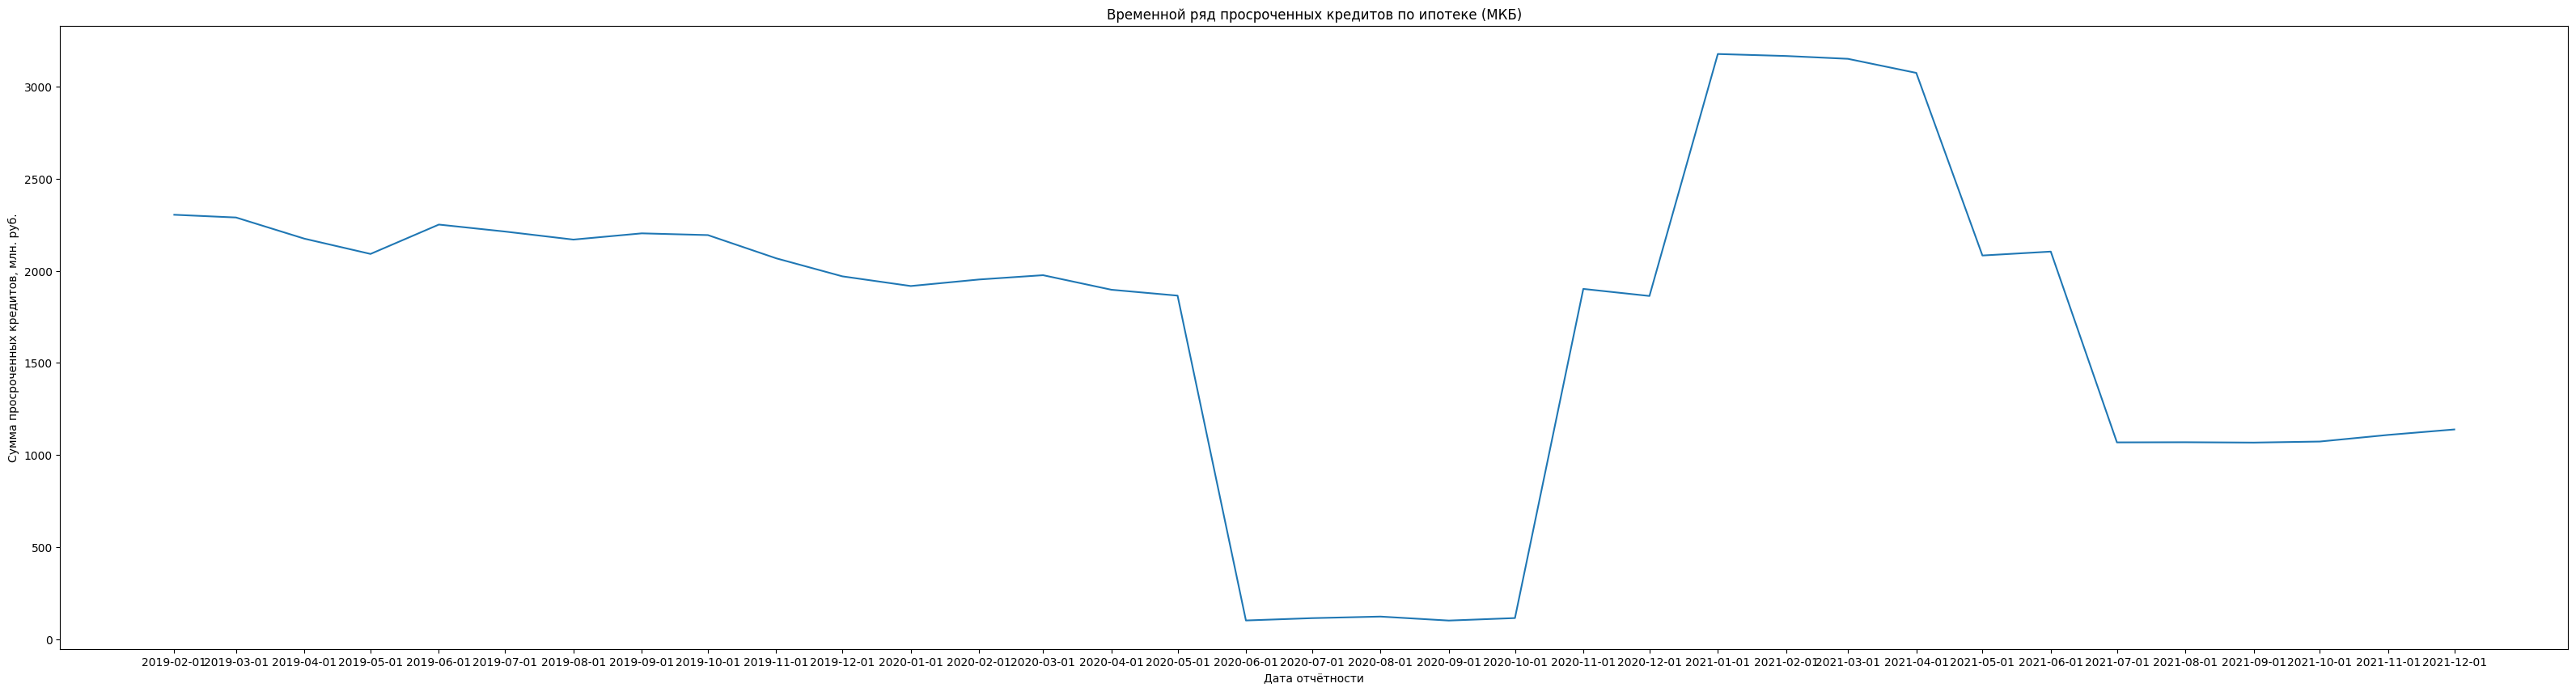

In [40]:
mkb_ZDLPRR_fig = mkb_ZDLPRR.copy()
mkb_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(mkb_ZDLPRR_fig)
plt.xticks(mkb_ZDLPRR_fig.index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (МКБ)")
plt.show()

In [18]:
#vtb_ZDLPRR = get_ZDLPRR(1000) # ВТБ
vtb_ZDLPRR = get_ZDLPRR(1000, False) # ВТБ
vtb_ZDLPRR

,ZDLPRR
2019-02-01,2.783623e+07
2019-03-01,2.756652e+07
2019-04-01,2.803724e+07
2019-05-01,2.807012e+07
2019-06-01,2.815125e+07
2019-07-01,2.829236e+07
2019-08-01,2.816554e+07
2019-09-01,2.841288e+07
2019-10-01,2.844345e+07
2019-11-01,2.895079e+07


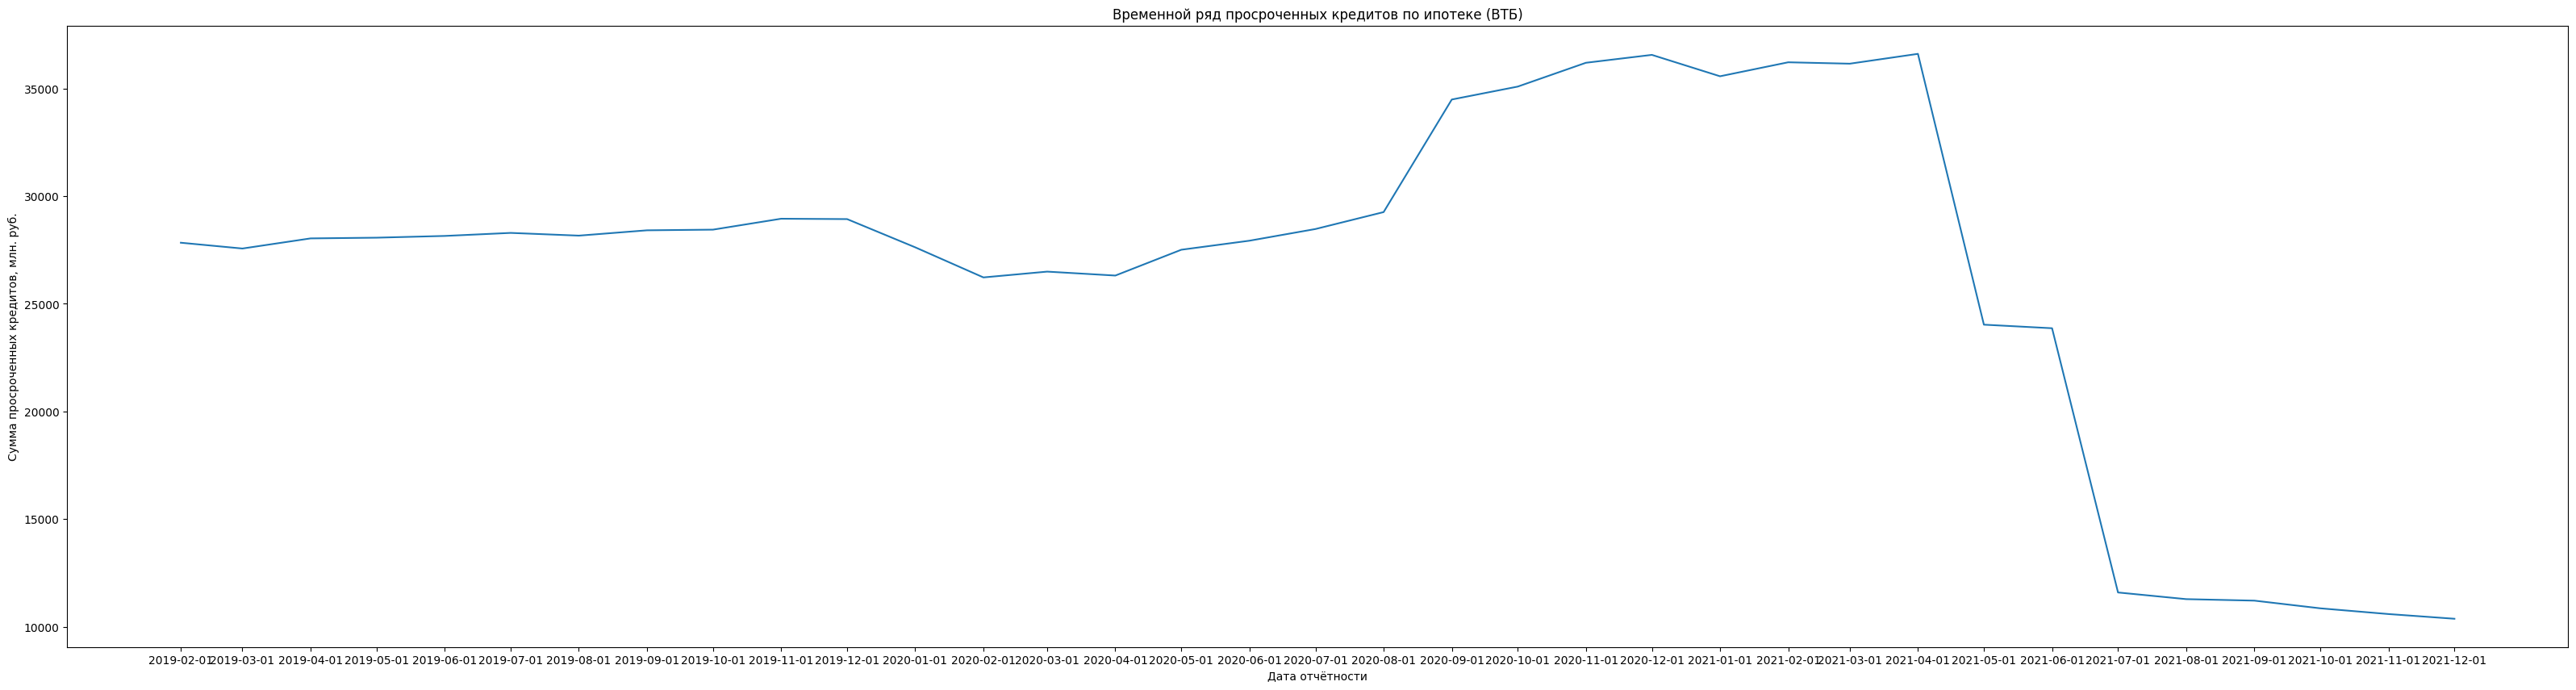

In [41]:
vtb_ZDLPRR_fig = vtb_ZDLPRR.copy()
vtb_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(vtb_ZDLPRR_fig)
plt.xticks(vtb_ZDLPRR_fig.index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (ВТБ)")
plt.show()

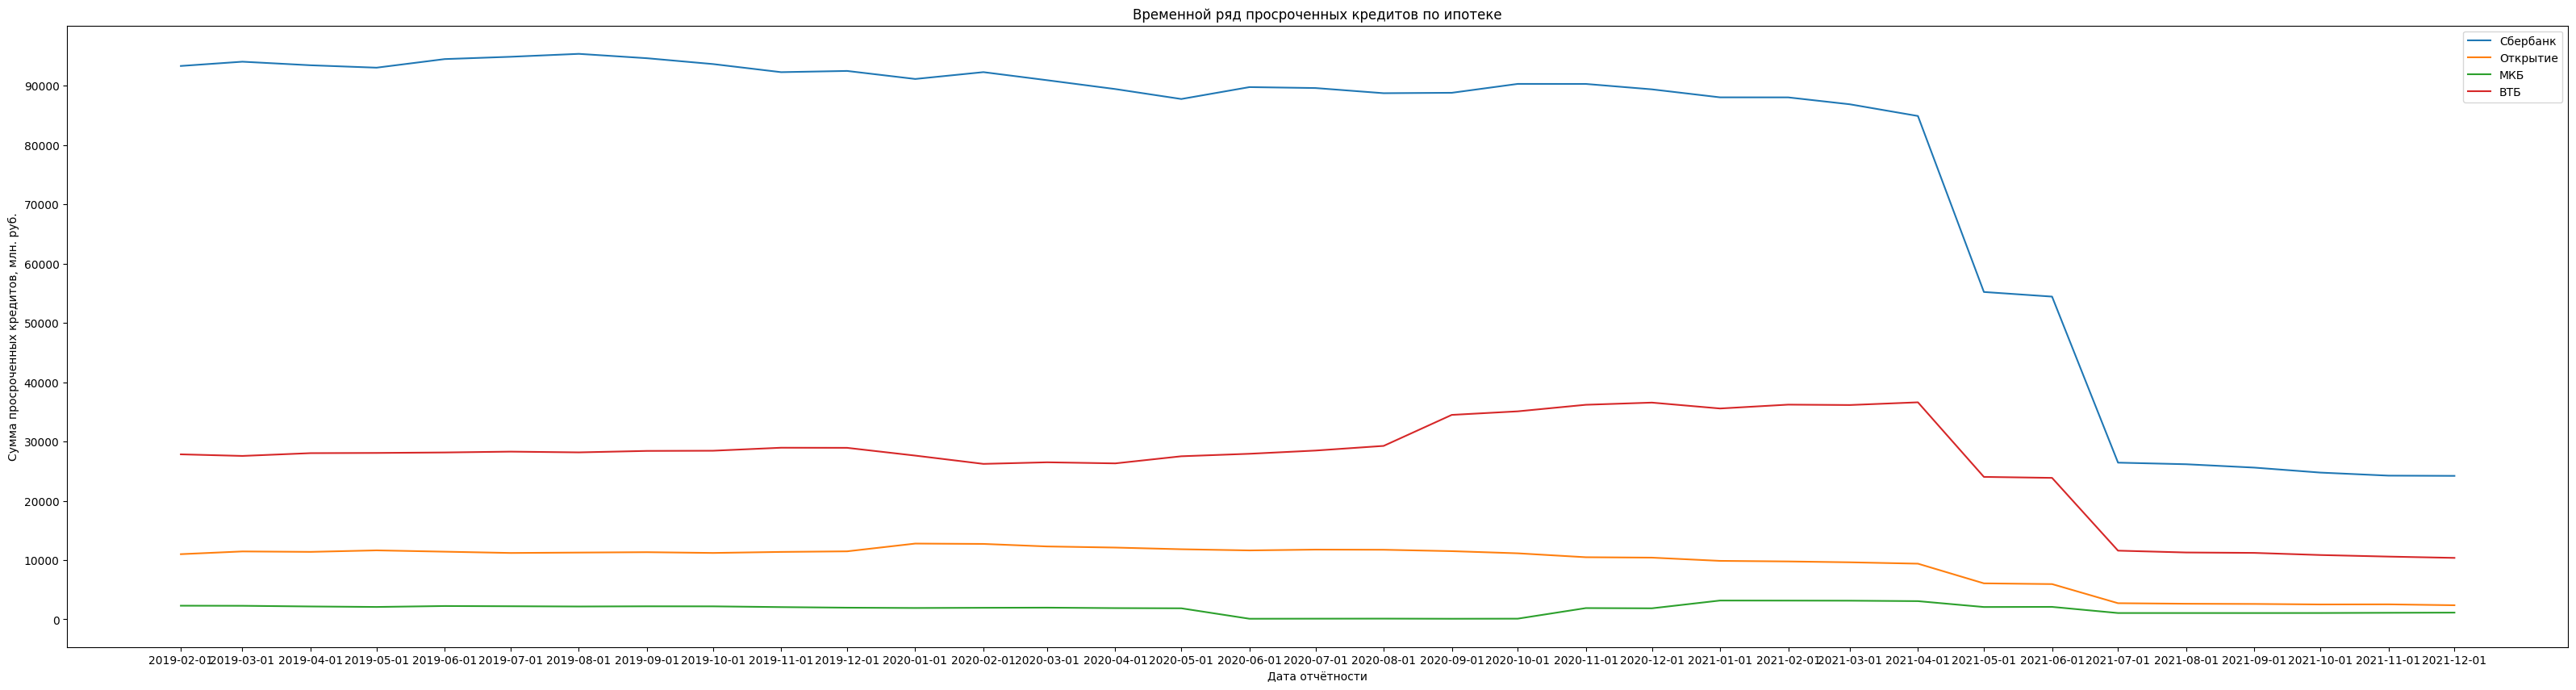

In [42]:
plt.figure(figsize=(40, 10))
plt.plot(sberbank_ZDLPRR_fig, label="Сбербанк")
plt.plot(otkrytiye_ZDLPRR_fig, label="Открытие")
plt.plot(mkb_ZDLPRR_fig, label="МКБ")
plt.plot(vtb_ZDLPRR_fig, label="ВТБ")
plt.xticks(sberbank_ZDLPRR_fig.index)
plt.yticks(np.arange(0, np.round(np.max([sberbank_ZDLPRR_fig, otkrytiye_ZDLPRR_fig, mkb_ZDLPRR_fig, vtb_ZDLPRR_fig]), -1), 10000))
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке")
plt.legend()
plt.show()